# Predicting Boston Housing Prices
## Supervised Learning: Model Evaluation & Validation

In this project, I train a decision tree regression model to predict housing prices in Boston.

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Data Exploration

In [19]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for selling-price prediction
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


In [20]:
# Number of houses and features in the dataset
total_houses, total_features = np.shape(housing_features)

# Number of features in the dataset
#total_features = np.size(housing_features)

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Potentially Significant Features
As a reminder, the description of the Boston Housing dataset can be viewed [here](https://archive.ics.uci.edu/ml/datasets/Housing), where the different features under **Attribute Information** can be found.

1) CRIM: per capita crime rate by town.  
2) RM: average number of rooms per dwelling.  
3) DIS: weighted distances to five Boston employment centres.  

In [148]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


11.95 corresponds to CRIM, 5.609 corresponds to RM, and 1.385 corresponds to DIS.

# Evaluating Model Performance
In this section of the project, I will begin to develop the tools necessary for a model to make a prediction.

In the code block below, I use the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

In [21]:
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Reasoning for Splitting the Data

The data is split into training and testing subsets for our model because:
1) it gives estimates of performance on an independent dataset.
2) it serves as check on overfitting.
3) if it isn't, data leakage may occur which is when the model makes predictions on data it has already seen.

## Performance Metric
In the code block below, `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

In [22]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    error = mean_squared_error(y_true, y_predict)
    return error
 
# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Most Appropriate Performance Metric
Because predictions are made on continuous data, I decided to use a regression metric. Two common metrics for regression are mean absolute error (MAE) and mean squared error (MSE). I chose to use MSE over MAE because some benefits of squaring the residual error is that error terms are positive, it emphasizes larger errors over smaller errors, and is differentiable. Being differentiable allows us to use calculus to find minimum or maximum values, often resulting in being more computationally efficient.

## Step 4 (Final Step)
In the code block below, the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 3**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [23]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Parameters to tune
    # max depth of decision tree
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    # greater_is_better = False because small error is favorable
    scoring_function = make_scorer(performance_metric, greater_is_better = False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring = scoring_function, cv = 3)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Grid Search Algorithm  
The grid search algorithm runs k-fold cross-validation for each set of parameter values and will choose the set with the best result. This algorithm is applicable when the default parameters given to the algorithms in sklearn do not apply to the problem at hand; grid search finds, in a programmatic way, the parameters that are most suitable for the problem at hand.

## Cross-Validation
Cross-validation is a way to improve the accuracy of a model's performance by running multiple learning experiences and averaging the results. In our particular example, I used k-fold cross-validation to run k seperate learning experiments, each of which seperated our data into k bins and reserved one of those bins for testing data; I used k = 3 because I want to hold 30% of our data for testing and 1/k for k = 3 is roughly 30%. This is useful when using grid search because grid search runs k-fold cross-validation for each set of parameter values and will choose the set with the best result. If I don't cross-validate (i.e. limit gridsearch to a single training set), I may accidentally overfit our model due to random splitting of the data. By using cross-validation, the chances of random anomolies due to random splitting is greatly reduced, ultimately producing a more accurate model. Cross-validation also maximizes data usage by allowing extensive exploitation of our data, thereby allowing a more accurate assessment of our algorithm in terms of performance metrics.

# Learning Curve and Model Complexity Functions

In [24]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # Cary the training set size for 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [15]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # Vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section, I will look at several models' learning and testing error rates on various subsets of training data. Additionally, I will investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


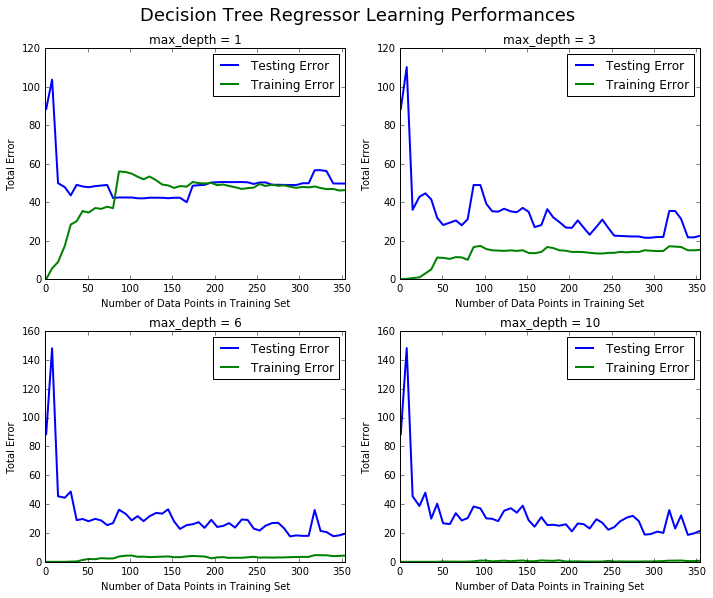

In [25]:
learning_curves(X_train, y_train, X_test, y_test)

## Max Depth of Chosen Model
I choose a max depth of 6. As the size of the training set increases, the training error increases very slightly whereas the testing error rapidly decreases, fluctuates, and then levels off.

## Max Depth Analysis
When the model is using the full training set, it suffers from high bias when the max depth is 1 (i.e. underfit, high training error). When the max depth is 10, the model suffers from high variance (i.e. overfit, very low training error and very high testing error).

Creating a model complexity graph. . . 


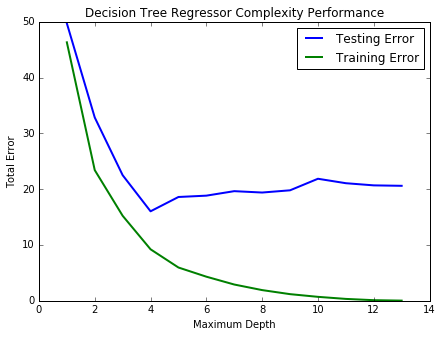

In [26]:
model_complexity(X_train, y_train, X_test, y_test)

## Graph Interpretation
As the max depth increases, the training error converges to 0 and the testing error decreases to its minimum at a max depth of 4 and fluctuates after that. Note that the best model is the one that generalizes better and has the lowest possible complexity. So, I suspect that a max depth of 4 is optimal since the testing error reaches its minimum here with the least complexity. A max depth of greater than 4 is not favorable because variance (i.e. overfitting) becomes higher and higher as the testing error fluctuates the training error converges to 0. A max depth less than 4 is also not favorable because of the high training and testing errors; bias (i.e. underfitting) becomes higher and higher as the max depth decreases.

# Model Prediction
In this final section, I will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize a model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set I've made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing the model's performance. 

## Optimal Max Depth Parameter

In [28]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 8


The optimal max_depth parameter for my model is 8. This is twice my intution, which is 4. 

## Best Selling Price of Client's Home

In [30]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 18.817


The best selling price for my client's home is 18.817, which is closer to the median (21.2) than the mean (22.533). With a standard deviation of 9.188 and a median close to the mean, I can conclude that the price of the client's home falls in roughly the 35th percentile.

## Conclusion
I would use this model to predict the selling price of future clients' homes in the Greater Boston area because I applied a few methods to improve the accuracy of our predictions: (1) I cross-validated to ensure accurate performance by taking the average of multiple learning experiences, and grid searched to find the most suitable parameter, and (2) I found the sweet spot between bias and variance by finding the optimal complexity (i.e. depth of decision tree) of our model. However, a downside to the model is that it's possible that some features are insignificant which may throw off the model, but it is not clear which features may be insignificant.